# Dynamic Programming HW 1

## Problem 1

### Optimization Problem 

$$
\max_{c^h_j}U^h(v(c_o^h))+\frac{1}{S}\sum_s v(C_s^h) \\
s.t. c_o^h = e_o^h - q_1\theta_1^h-q_2\theta_2^h \\
c_s^h = e_s^h - A^1_s\theta_1^h-A^2_s\theta_2^h \\
h = 1,2
$$

#### FOCs: 

$$
q_1v'(c_o^h)=  \frac{1}{S}\sum_s v'(c_s^h) A^1_s \\
q_2v'(c_o^h)=  \frac{1}{S}\sum_s v'(c_s^h) A^2_s \\
h = 1,2
$$

#### Market Clearing

$$
\theta_1^1+\theta_1^2 = 0 \\
\theta_2^1+\theta_2^2 = 0 
$$

In [12]:
gamma = "global"

from scipy.optimize import fsolve
import numpy as np

def mv(c):
    mu = c**(-gamma)
    return mu

def fun_c_o(e_o,q1,q2,theta1,theta2):
    c_o = e_o - q1*theta1-q2*theta2
    return c_o

def fun_c_s(e_s,A1,A2,theta1,theta2):
    c_s = e_s + A1*theta1+A2*theta2
    return c_s

In [71]:
def equations(variable):
    q1,q2,theta11,theta12,theta21,theta22 = variable
    A1 = [1,1,1,1]
    A2 = [1,1,1.5,1.5]
    e1 = [1,1,2,1,2]
    e2 = [1,3,1,3,1]

    S = len(A1)
#    c_s=np.zeros(S-1)
    RHS11 = 0
    RHS12 = 0
    RHS21 = 0
    RHS22 = 0

    c_s1 = np.zeros(S)
    c_s2 = np.zeros(S)
    
    for i in range(S):
        c_s1[i]=fun_c_s(e1[i+1],A1[i],A2[i],theta11,theta12)
        c_s2[i]=fun_c_s(e2[i+1],A1[i],A2[i],theta21,theta22)   
        #set_trace()
        RHS11 = RHS11+mv(c_s1[i])*A1[i]
        RHS12 = RHS12+mv(c_s1[i])*A2[i]
        RHS21 = RHS21+mv(c_s2[i])*A1[i]
        RHS22 = RHS22+mv(c_s2[i])*A2[i]

    
    c_o1 = fun_c_o(e1[0],q1,q2,theta11,theta12)
    c_o2 = fun_c_o(e2[0],q1,q2,theta21,theta22)
    #two assets, persion 1    
    f1 = q1*mv(c_o1) - 1/S *RHS11
    f2 = q2*mv(c_o1) - 1/S *RHS12
    #two assets, persion 2    
    f3 = q1*mv(c_o2) - 1/S *RHS21  
    f4 = q2*mv(c_o2) - 1/S *RHS22
    #Market clearing
    f5 = theta11+theta21
    f6 = theta12+theta22
    return (f1,f2,f3,f4,f5,f6)


In [72]:
gammas = (2,4,8,166)

for idx, gamma in enumerate(gammas):
    [q1,q2,theta11,theta12,theta21,theta22] = fsolve(equations,(.5,.5,.5,.5,.5,.5));
    print('for gamma = ' + str(gamma) + ', the solution is:')
    print('q1,q2,theta11,theta12,theta21,theta22')
    print(np.round([q1,q2,theta11,theta12,theta21,theta22],4))


for gamma = 2, the solution is:
q1,q2,theta11,theta12,theta21,theta22
[ 0.5898  0.7372  0.0195 -0.     -0.0195  0.    ]
for gamma = 4, the solution is:
q1,q2,theta11,theta12,theta21,theta22
[ 0.5187  0.6483  0.004   0.     -0.004  -0.    ]
for gamma = 8, the solution is:
q1,q2,theta11,theta12,theta21,theta22
[ 5.010e-01  6.263e-01  2.000e-04  0.000e+00 -2.000e-04 -0.000e+00]
for gamma = 166, the solution is:
q1,q2,theta11,theta12,theta21,theta22
[ 0.5    0.625  0.    -0.    -0.     0.   ]


## Problem 2

## Problem 3: Stochastic Ramsey Model 

The dynamic problem 
$$
\max_{c_t} E_0 \beta^t U(c_t) \\
s.t. c_t + k_{t+1} = z(s_t)f(k_t)+(1-\delta(s))k_t
$$

The Bellman Equation is

$$
V(k,s) = \max u(c) + \beta \sum_{s'}p(k',s')V(k',s')
$$

with $c = \bar{f}(k,s)- k'$

where $u(c)=ln(c)$ and $\bar{f}(k,s)= \begin{cases}.9 k^{.3}+.3k \text{, for } s =1 \\ 1.1 k^{.3}+.9k  \text{, for } s =2\end{cases}$

I get the upper and lower value of $k$ in the grid ($\bar{k}$ and $\underline{k}$ respecively) from the steady state condition in each of the two cases for $\bar{f(k,s}$ such that 

$$
1 = \beta \bar{f}(k,s)
$$

In [142]:
beta = "global"
beta = .9


def f_fun(s,k):
    #f bar
    if s == 1: 
        a = .9
        b = .3
    elif s == 2:
        a = 1.1
        b = .9
    else:
        print(s)
        raise ValueError('s can only take values of 1 or 2')
    f = a*k**.3+b*k
    return f

def f_prim_fun(s,k):
    #first derivative of f bar
    if s == 1: 
        a = .9
        b = .3
    elif s == 2:
            a = 1.1
            b = .9
    else:
        print(s)
        raise ValueError('s can only take values of 1 or 2')
    f = a*.3*k**(-.7)+b
    return f

def steady_st_k(s):
    # steady state k, based on the Euler eq. (slide set 2, slide 58) 
    if s == 1: 
        a = .9
        b = .3
    elif s == 2:
            a = 1.1
            b = .9
    else:
        raise ValueError('s can only take values of 1 or 2')
    k_str = ((1/beta - b)*(1/(a*.7)))**(-1/.7)
    return k_str


In [724]:
def ramsey_2state_value_fn(gr_points):

    import numpy as np

    states = [1,2]
    S = len(states) #Number of states 

    k_low = 0.01 # steady_st_k(1)
    k_up = 10 #steady_st_k(2) 
    k_grid = np.linspace(k_low,k_up,gr_points) # Discretize the possible capital values to 50 points.

    # Initialize value fn
    V_prim = np.zeros((2,gr_points))
    V = np.zeros_like(V_prim)
    c = np.zeros_like(V_prim)
    c_opt = np.zeros_like(V_prim)
    index_max = np.zeros_like(V_prim)
    u = np.zeros_like(V_prim)
    policy_idx = [0,0]
    policy_k = np.zeros_like(V_prim)


    tol = 1e-5
    epsilon = 100
    
    while epsilon > tol:
        for i,k in enumerate(k_grid):    #loop through today's capital
            c[0,:] = f_fun(1,k) - k_grid # consumption implied by policy k_next in state 1
            c[1,:] = f_fun(2,k)- k_grid  # consumption implied by policy k_next in state 2
            u[c > 0] = np.log(c[c > 0] )
            u[c <= 0] = -1000000

            V_action_choice = u + beta * (V_prim[0,:] + V_prim[1,:])/2 
            V[:,i] = np.amax(V_action_choice, axis=1)
            
            policy_idx = np.argmax(V_action_choice, axis=1)
            policy_k[:,i] = k_grid[policy_idx]

        epsilon = np.linalg.norm(V_prim - V)**2
        V_prim = V.copy()

    return V, policy_k, k_grid



219.7126211930921
15.960294207805232
8.320663961648755
10.042290812216685
10.990952005304084
10.621921066196961
9.577059830907007
8.248421072179738
6.903055154742095
5.678655653772585
4.62787628786172
3.758632636130734
3.048268031347295
2.4704320010245544
2.0015566686231367
1.621464759548938
1.3134684502279503
1.0639424205725678
0.8618066214265063
0.6980686956018967
0.5654377874390111
0.45800546984049856
0.3709847771320581
0.30049780879938087
0.24340328113389986
0.19715668023127728
0.1596969200362656
0.12935450886634292
0.10477715364343115
0.08486949503859711
0.06874429121731716
0.05568287598088029
0.04510312958262422
0.03653353497723781
0.029592163337714316
0.023969652306020255
0.019415418368869102
0.015726488879182734
0.012738455992297913
0.010318149353825528
0.008357700976624595
0.006769737791076479
0.005483487610776247
0.004441624964730205
0.0035977162214319426
0.0029141501393602485
0.0023604616128819053
0.0019119739064345353
0.0015486988642120936
0.0012544460800116973
0.0010161013

<IPython.core.display.Javascript object>


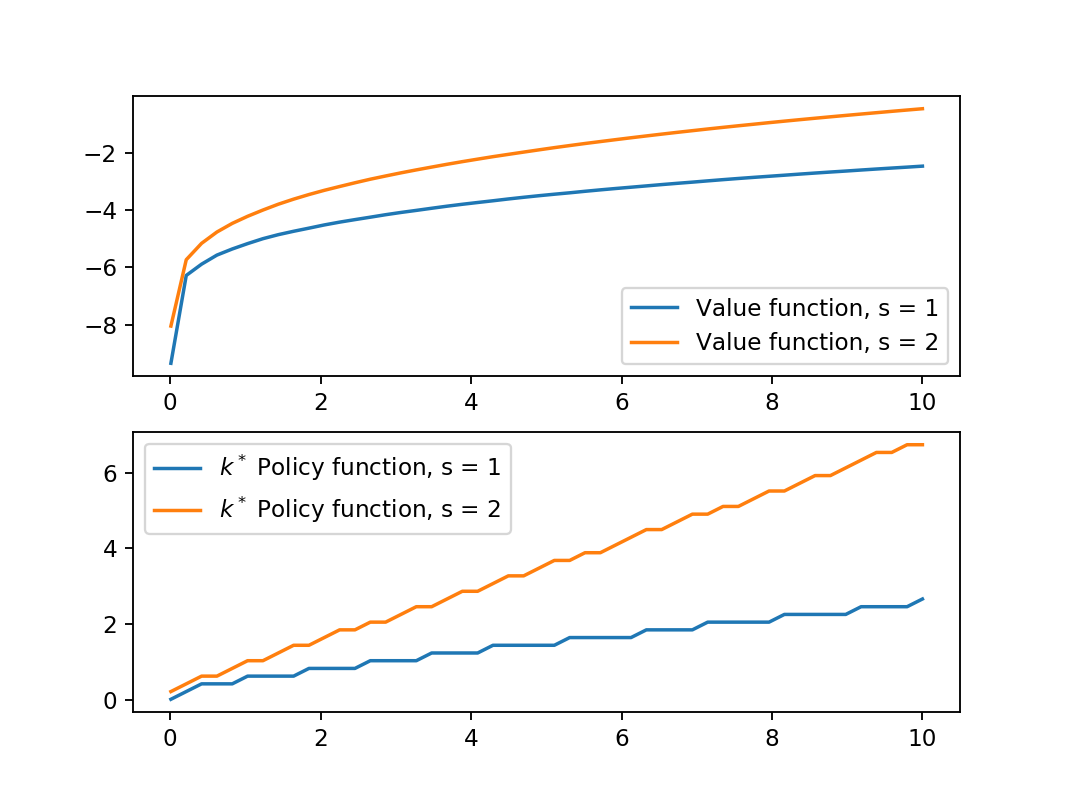

In [725]:
# 50 Grid points

import matplotlib.pyplot as plt
%matplotlib notebook

V,k_policy, k_grid  = ramsey_2state_value_fn(50)

plt.subplot(2, 1, 1)
plt.plot(k_grid, V[0,:], label='Value function, s = 1')
plt.plot(k_grid, V[1,:], label='Value function, s = 2')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(k_grid, k_policy[0,:], label='$k^*$ Policy function, s = 1')
plt.plot(k_grid, k_policy[1,:], label='$k^*$ Policy function, s = 2')
plt.legend()




<IPython.core.display.Javascript object>


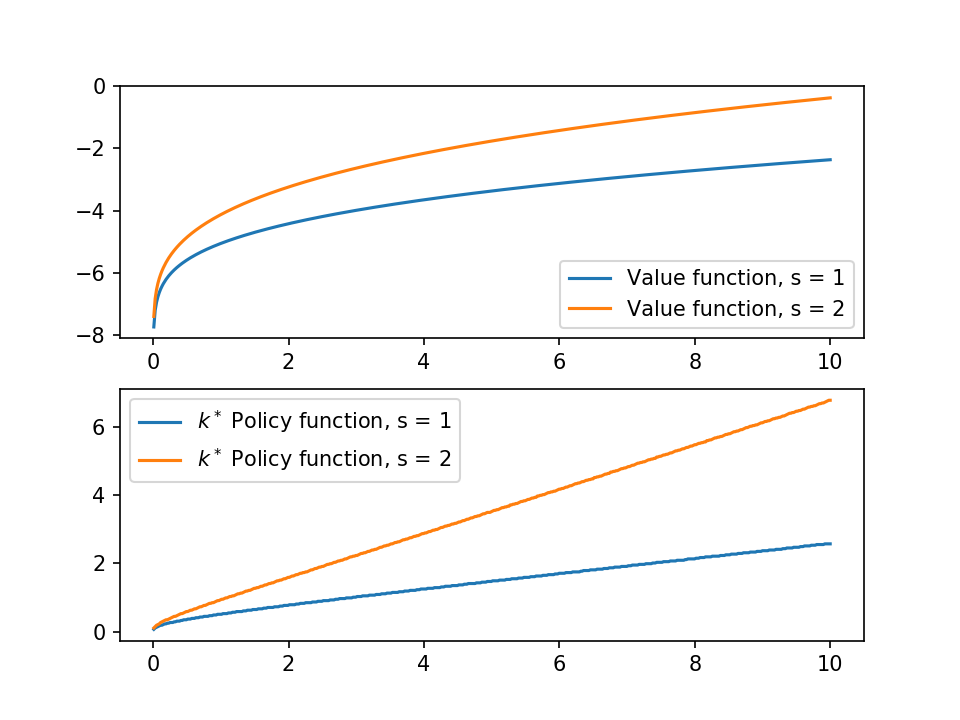

In [633]:
# 500 Grid points
import matplotlib.pyplot as plt
%matplotlib notebook

V,k_policy, k_grid  = ramsey_2state_value_fn(500)

plt.subplot(2, 1, 1)
plt.plot(k_grid, V[0,:], label='Value function, s = 1')
plt.plot(k_grid, V[1,:], label='Value function, s = 2')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(k_grid, k_policy[0,:], label='$k^*$ Policy function, s = 1')
plt.plot(k_grid, k_policy[1,:], label='$k^*$ Policy function, s = 2')
plt.legend()


# Homework 2

## 2.1 Descrete shock

The Euler equation (to be solved for $k_{t+1}$) after substituting in consumption is
$$
u'(f(k_t,s_t)-k_{t+1}) = \beta E[f'(k_{t+1},s_{t+1})u'(f(k_{t+1},s_{t+1}) - k_{t+2})] 
$$

which we approxmate as 

$$
u'(f(k,s)-k') = \beta E[f'(k',s')u'((k',s') - \hat{g}(k',s'))] 
$$

where $\hat{g}(k,s)$ is an approximation of the policy function. The equation can be solved numerically for $k'$ given a grid on $\hat{g}(k',s')$ accross states and capital

In [672]:
def mutil_log(x):    
    mu = 1/x
    return mu
    
def mutil_crra(x):
    mu = x**(-gamma)
    return mu    

def euler(k,k_prim,s,gk_prim_interpol_s1,gk_prim_interpol_s2,utility_type):
    
    p = [.5, .5]
    states = (1,2)

    if utility_type == 'log':
        expectation = f_prim_fun(1,k_prim)*mutil_log(f_fun(1,k_prim) - gk_prim_interpol_s1(k_prim))*p[0] \
            + f_prim_fun(2,k_prim)*mutil_log(f_fun(2,k_prim) - gk_prim_interpol_s2(k_prim))*p[1]
        eq =  mu_log(f_fun(s,k)-k_prim) - beta*expectation
    elif utility_type =='CRRA':
        expectation = f_prim_fun(1,k_prim)*mutil_crra(f_fun(1,k_prim) - gk_prim_interpol_s1(k_prim))*p[0] \
            + f_prim_fun(2,k_prim)*mutil_crra(f_fun(2,k_prim) - gk_prim_interpol_s2(k_prim))*p[1]
        eq =  mutil_crra(f_fun(s,k)-k_prim) - beta*expectation
        
    else:
        print(utility_type)
        raise ValueError('Utility type is either CRRA or log')        
            
        
    return eq

In [699]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
from scipy.interpolate import interp1d
import decimal

def euler(k,k_prim,s,gk_prim_interpol_s1,gk_prim_interpol_s2,utility_type):
    
    p = [.5, .5]
    states = (1,2)

    if utility_type == 'log':
        expectation = f_prim_fun(1,k_prim)*mutil_log(f_fun(1,k_prim) - gk_prim_interpol_s1(k_prim))*p[0] \
            + f_prim_fun(2,k_prim)*mutil_log(f_fun(2,k_prim) - gk_prim_interpol_s2(k_prim))*p[1]
        eq =  mu_log(f_fun(s,k)-k_prim) - beta*expectation
    elif utility_type =='CRRA':
        expectation = f_prim_fun(1,k_prim)*mutil_crra(f_fun(1,k_prim) - gk_prim_interpol_s1(k_prim))*p[0] \
            + f_prim_fun(2,k_prim)*mutil_crra(f_fun(2,k_prim) - gk_prim_interpol_s2(k_prim))*p[1]
        eq =  mutil_crra(f_fun(s,k)-k_prim) - beta*expectation
        
    else:
        print(utility_type)
        raise ValueError('Utility type is either CRRA or log')        
            
        
    return eq

def ramsey_policy_iter(k_grid,utility_type,interpol_type): 
    #Solve numerically stochastic ramsey problem by policy iteration 
    
    states = [1,2]
    S = len(states) #Number of states 
    beta = 0.9

    k_low = 0.1 # steady_st_k(1)
    k_up = 3 #steady_st_k(2) 
    
    k_prim_policy = np.zeros((2,gridpoints))
    k_prim_policy[0,:] =np.ones((1,gridpoints))*k_low # set to Chebyshev nodes later on
    k_prim_policy[1,:] =np.ones((1,gridpoints))*k_low # set to Chebyshev nodes later on
    k_prim_policy_old = np.zeros_like(k_prim_policy)
    # k_prim_policy_s2 =np.ones(1,gridpoints)*k_grid(1,0) # set to Chebyshev nodes later on   

    # set to Chebyshev nodes later on   
    # k_prim_opt = np.zeros_like(gk_grid)

    # Initialize policy fn
    #g_hat = np.zeros((S,gr_points))
    k0 = k_low # guess for the optimizer 

    epsilon = 100
    tol = 1.e-5

    #while epsilon > tol:
    for i in range(20):
    #for jj in range(5):
        # Loop through the points in k_grid and evaluate k_prim for each
        #print('k_policy',k_prim_policy)

        gk_prim_interpol_s1 = interp1d(k_grid, k_prim_policy[0,:], kind = interpol_type) #splrep(k_grid, k_prim_policy[0,:]) #
        gk_prim_interpol_s2 = interp1d(k_grid, k_prim_policy[1,:], kind = interpol_type) #splrep(k_grid, k_prim_policy[0,:]) #

        for kk in range(gridpoints):
            # Loop through States
            for ss in range(S):
                k = k_grid[kk]
                s = ss + 1
                euler_current = lambda k_prim: euler(k,k_prim, s, gk_prim_interpol_s1,gk_prim_interpol_s2,utility_type)
                k_prim_policy[ss,kk] = fsolve(euler_current,k0)

        c = np.zeros_like(k_prim_policy)
        c[0,:] = f_fun(1,k_grid) - k_prim_policy[0,:]
        c[1,:] = f_fun(2,k_grid) - k_prim_policy[1,:]

        #print('k',k_prim_policy)
        #print('c',c)

        # Evaluate

        epsilon = np.max(abs(k_prim_policy - k_prim_policy_old))
        k_prim_policy_old = k_prim_policy.copy()
        #print('epsilon',epsilon)
        return k_prim_policy 



<IPython.core.display.Javascript object>


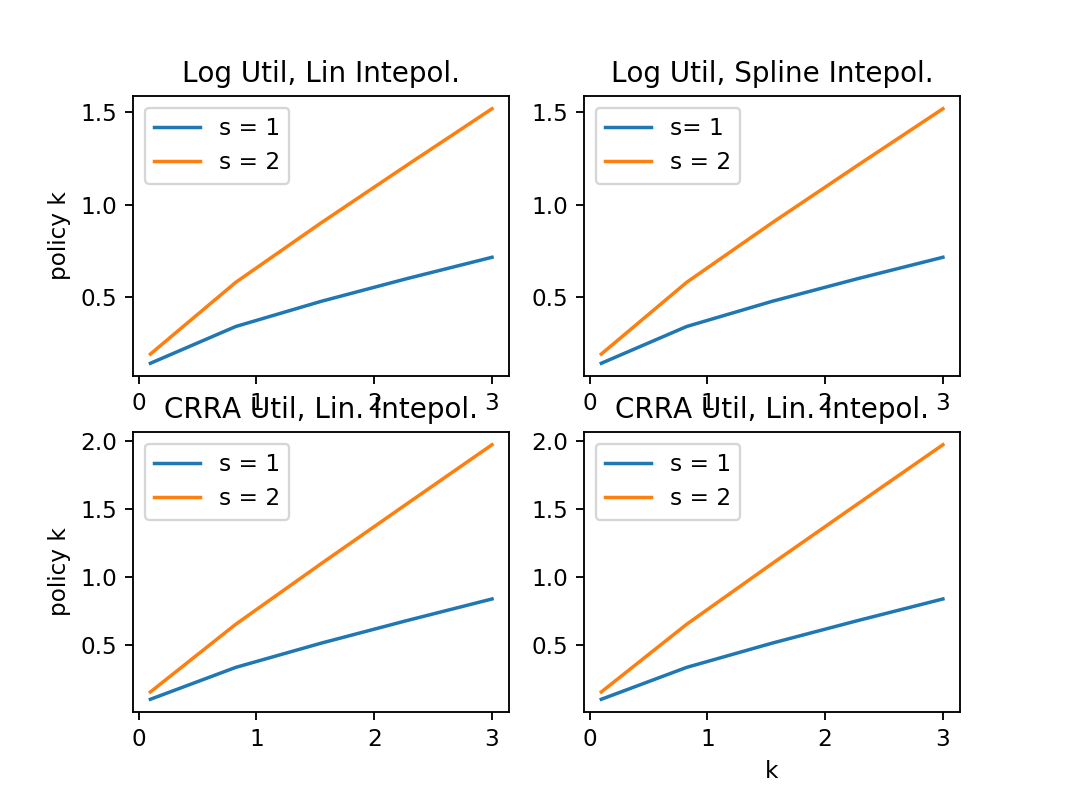

In [723]:
# Linear Interpol

#### LOG Util     
beta = 'global'
beta = .9

gridpoints = 5
k_grid = np.linspace(k_low,k_up,gridpoints)

k_prim_policy_log_lin = ramsey_policy_iter(k_grid,'log','linear') 

## CRRA Util 
gamma = 4 
k_prim_policy_crra_lin = ramsey_policy_iter(k_grid,'CRRA','linear') 


# Spline 

#### LOG Util     
beta = 'global'
beta = .9

gridpoints = 5
k_grid = np.linspace(k_low,k_up,gridpoints)

k_prim_policy_log_spline = ramsey_policy_iter(k_grid,'log','cubic') 


## CRRA Util 
gamma = 4 
k_prim_policy_crra_spline = ramsey_policy_iter(k_grid,'CRRA','cubic') 

###  Plotting ----------
plt.figure()

plt.subplot(221)
plt.plot(k_grid, k_prim_policy_log_lin[0, :], label='s = 1')
plt.plot(k_grid, k_prim_policy_log_lin[1, :], label='s = 2')
plt.legend()
plt.ylabel('policy k')
plt.title('Log Util, Lin Intepol.')
plt.show()

plt.subplot(222)
plt.plot(k_grid, k_prim_policy_log_spline[0, :], label='s= 1')
plt.plot(k_grid, k_prim_policy_log_spline[1, :], label='s = 2')
plt.legend()
plt.title('Log Util, Spline Intepol.')
plt.show()


plt.subplot(223)
plt.plot(k_grid, k_prim_policy_crra_lin[0, :], label='s = 1')
plt.plot(k_grid, k_prim_policy_crra_lin[1, :], label='s = 2')
plt.ylabel('policy k')
plt.legend()
plt.title('CRRA Util, Lin. Intepol.')
plt.show()

plt.subplot(224)
plt.plot(k_grid, k_prim_policy_crra_spline[0, :], label='s = 1')
plt.plot(k_grid, k_prim_policy_crra_spline[1, :], label='s = 2')
plt.legend()
plt.xlabel('k')
plt.title('CRRA Util, Lin. Intepol.')
plt.show()



In [713]:
k_grid_finer = np.linspace(k_low,k_up,100)
k_prim_policy_log_lin_finer = np.zeros((2,100))
k_prim_policy_log_spline_finer = np.zeros_like(k_prim_policy_log_lin_finer)

k_intep = interp1d(k_grid, k_prim_policy_log_lin[0,:], kind = 'linear')
k_prim_policy_log_lin_finer[0, :] = k_intep(k_grid_finer)
#print(k_prim_policy_log_lin_finer[0, :] )
k_intep = interp1d(k_grid, k_prim_policy_log_lin[0,:], kind = 'cubic')
k_prim_policy_log_spline_finer[0, :] = k_intep(k_grid_finer)


print(k_prim_policy_log_lin_finer)
print(k_prim_policy_log_spline_finer)


[[0.14095603 0.14900794 0.15705986 0.16511177 0.17316369 0.1812156
  0.18926752 0.19731943 0.20537135 0.21342326 0.22147518 0.22952709
  0.237579   0.24563092 0.25368283 0.26173475 0.26978666 0.27783858
  0.28589049 0.29394241 0.30199432 0.31004624 0.31809815 0.32615007
  0.33420198 0.34161751 0.34712391 0.35263031 0.3581367  0.3636431
  0.3691495  0.37465589 0.38016229 0.38566869 0.39117508 0.39668148
  0.40218788 0.40769427 0.41320067 0.41870707 0.42421346 0.42971986
  0.43522626 0.44073265 0.44623905 0.45174545 0.45725184 0.46275824
  0.46826464 0.47377103 0.47899862 0.48394739 0.48889616 0.49384493
  0.49879371 0.50374248 0.50869125 0.51364002 0.5185888  0.52353757
  0.52848634 0.53343511 0.53838389 0.54333266 0.54828143 0.5532302
  0.55817898 0.56312775 0.56807652 0.5730253  0.57797407 0.58292284
  0.58787161 0.59282039 0.59776916 0.60252434 0.60721499 0.61190564
  0.61659629 0.62128695 0.6259776  0.63066825 0.6353589  0.64004955
  0.6447402  0.64943085 0.65412151 0.65881216 0.663